In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR


import seaborn as sbs


In [23]:
#import dataset 
df = sklearn.datasets.load_boston()

In [37]:
house_price = pd.DataFrame(df.data, columns=df.feature_names)

##add the price column 

house_price['Price'] = df.target

#show
house_price.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
#statics describe
house_price.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [39]:
#dimension 
house_price.shape

(506, 14)

<h1>Check the correlation</h1>

<AxesSubplot:>

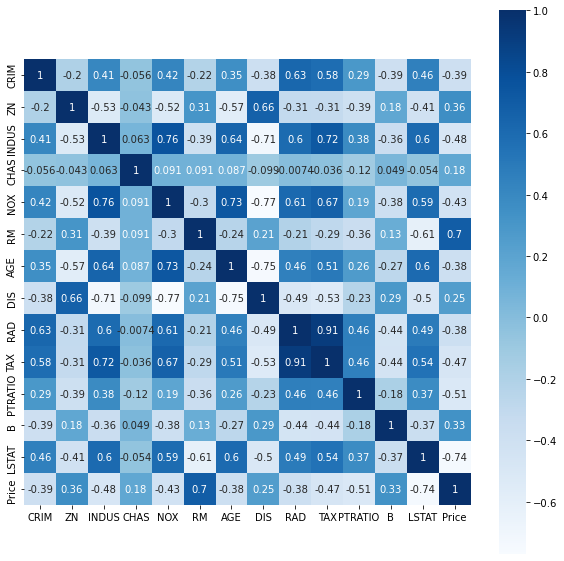

In [40]:
#corr 
plt.figure(figsize=(10,10))
sbs.heatmap(house_price.corr(),annot=True,square=True,annot_kws={'size':10},cmap='Blues')

In [29]:
#dtypes
house_price.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

<AxesSubplot:>

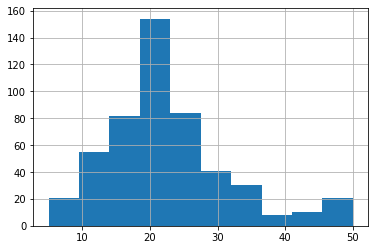

In [42]:
#
house_price['Price'].hist()

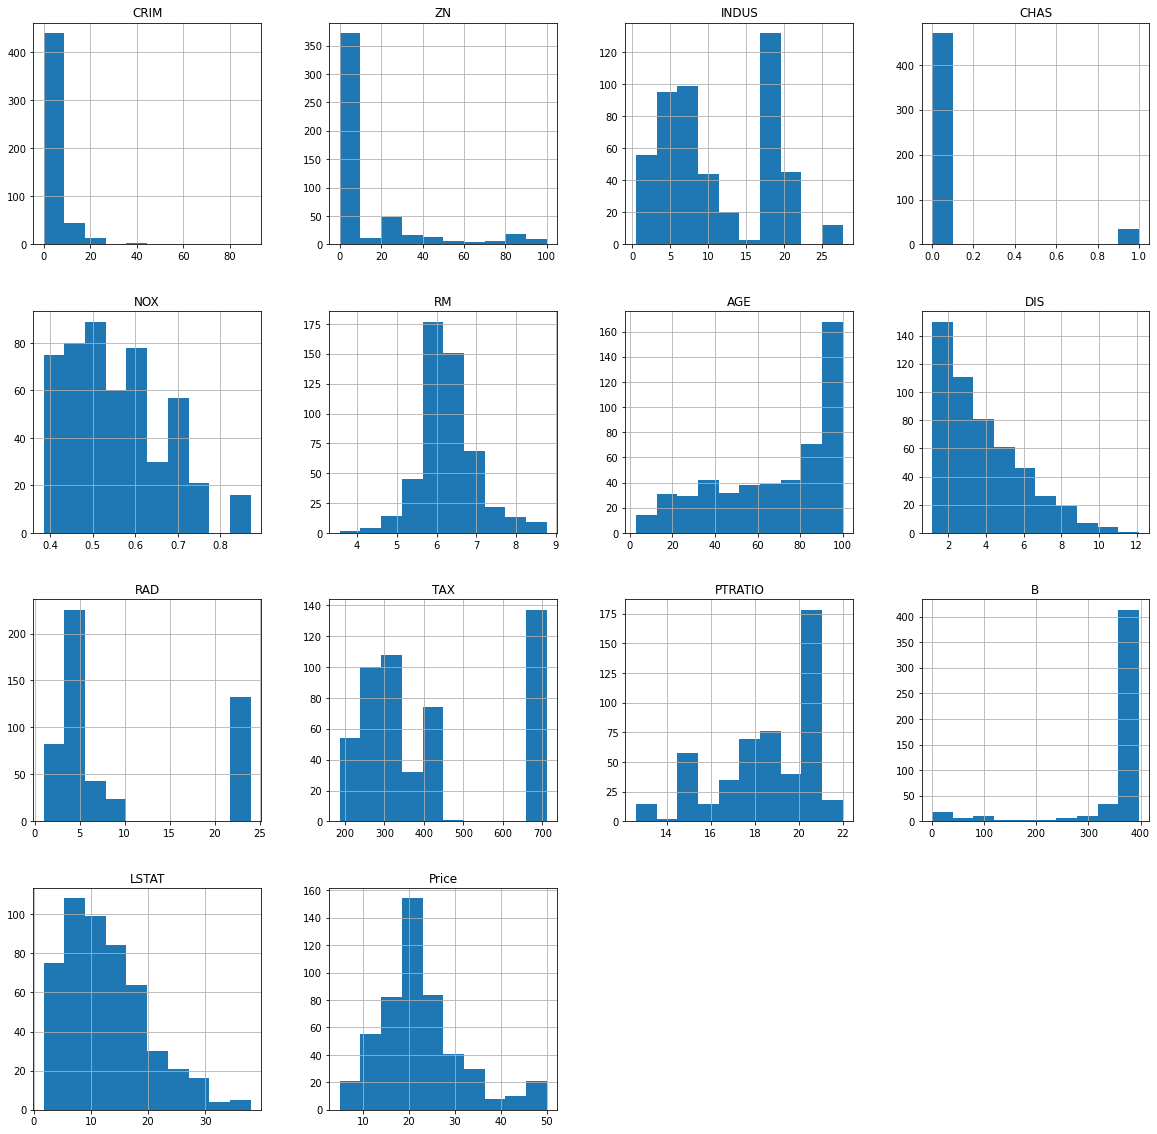

In [45]:
#all variables
house_price.hist(figsize=(20,20))
plt.show()

<h1>Features & target</h1>

In [57]:
X = house_price.drop(['Price'],axis=1)
y = house_price['Price']

#dimension
print(X.shape,y.shape)

(506, 13) (506,)


In [86]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=43)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [87]:
#model
model = LinearRegression().fit(X_train,y_train)
linear_predict = model.predict(X_test)

#calcute the loss function
linear_loss = mean_squared_error(y_test,linear_predict)
print(f'linear loss : {linear_loss}')

linear loss : 22.018613449500464


Text(0, 0.5, 'Prediction')

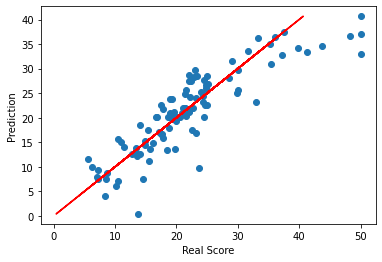

In [89]:
plt.scatter(y_test,linear_predict,)
plt.plot(linear_predict,linear_predict,c='r')
plt.xlabel('Real Score')
plt.ylabel('Prediction')


<h1>working with Estimators</h1>

In [93]:
estimators = {'SVR' : SVR(gamma='auto',C=1.0,epsilon=0.1),
              'RANSAC' : RANSACRegressor(),
              'HUBER' : HuberRegressor(epsilon=1.35)}

SVR
MSE :  90.72269503557072


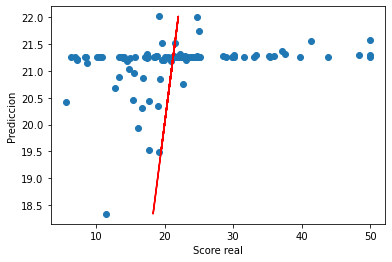

RANSAC
MSE :  53.56541996494783


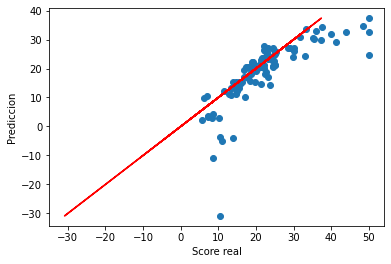

HUBER
MSE :  22.848347157360212


/Users/patodev/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


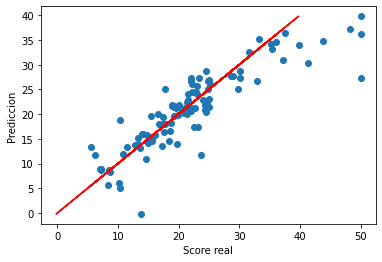

In [94]:
for name,estimator in estimators.items():
    estimator.fit(X_train,y_train)
    
    predictions = estimator.predict(X_test)
    MSE = mean_squared_error(y_test,predictions)
    
    print(name)
    print('MSE : ', MSE)
    
    plt.scatter(y_test,predictions)
    plt.plot(predictions,predictions,c='r')
    plt.ylabel('Prediccion')
    plt.xlabel('Score real')
    plt.show()